# N Step RW Generator

In [112]:
import random
import numpy as np
import matplotlib.pyplot as plt
import statistics

In [63]:
def RW(N,d):
    start = np.zeros(d)
    pos = [start]


    for i in range(N):
        
        cur = np.array(pos[-1])
        
        cur = cur + np.random.uniform(-0.5, 0.5, size=(d,))
        
        pos.append(cur)

    return(pos)
    

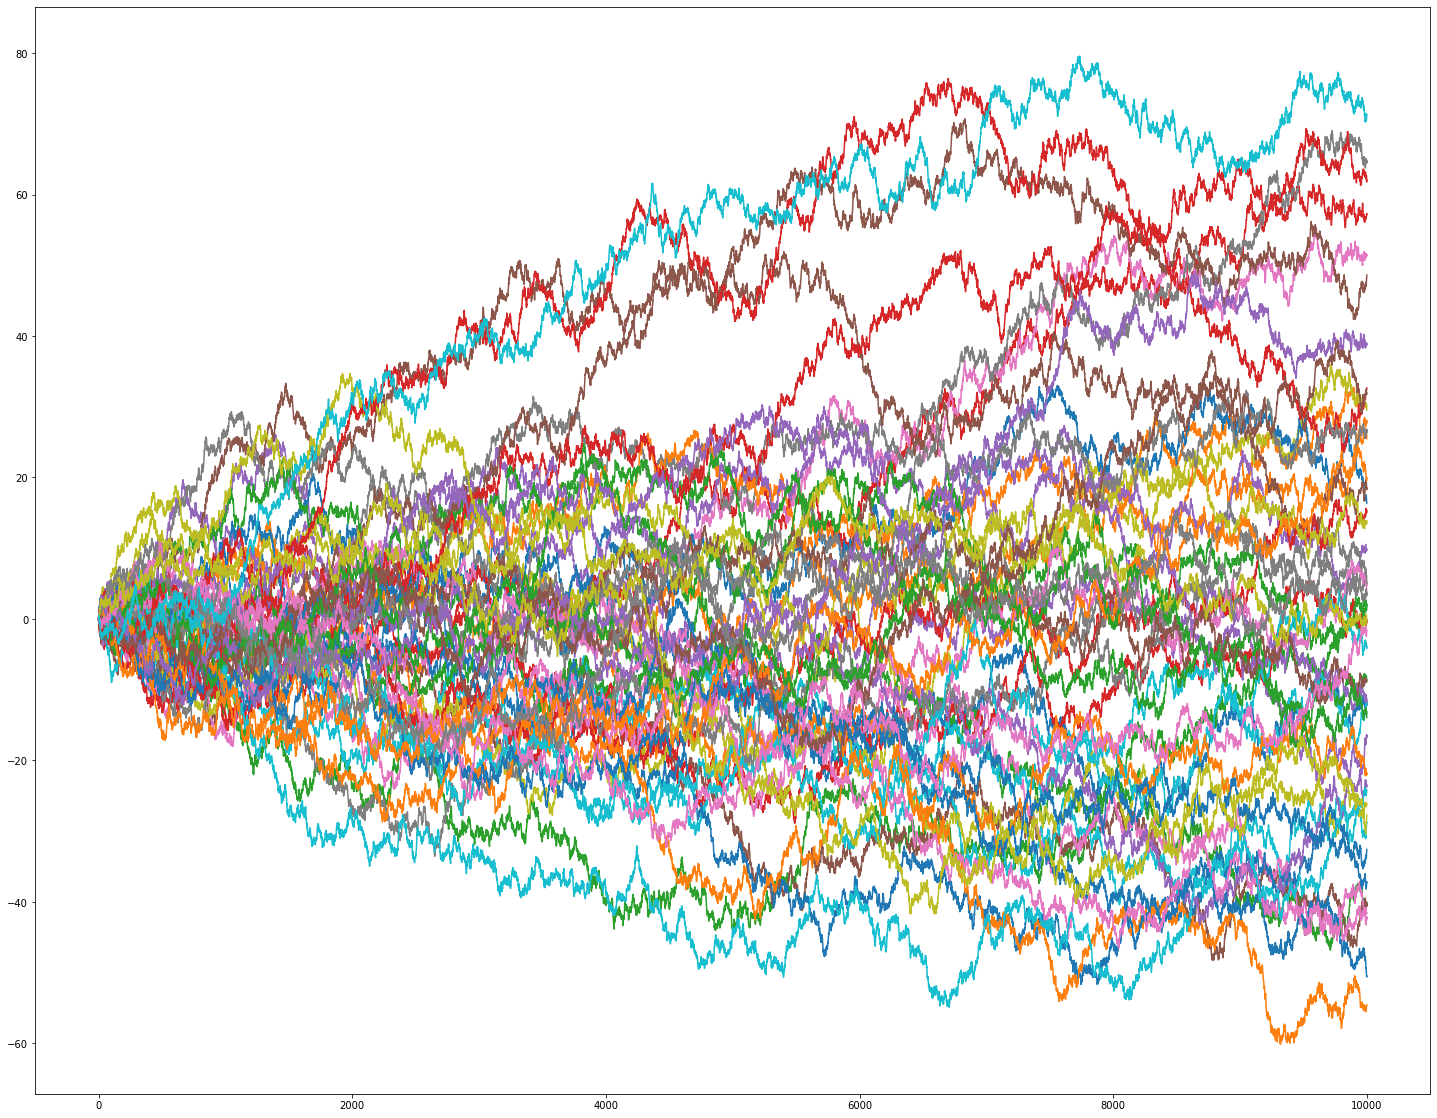

In [64]:
d = 1
N = 10000
fig = plt.figure(figsize=(25,20))

for i in range(50):
    p = RW(N,d)
    plt.plot(range(N+1),p)
    
plt.show()

(-1.466711885045671,
 0.43600814351294126,
 -0.18442473839955428,
 0.922549317361607)

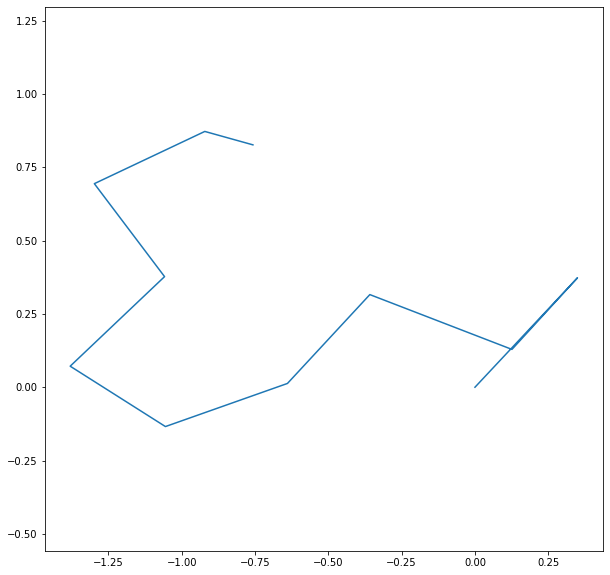

In [65]:
d=2
N = 10
fig = plt.figure(figsize=(10,10))
p = RW(N,d)
plt.plot([x[0] for x in p],[x[1] for x in p])
plt.axis('equal')


(-5.346152029790215, 13.117828788957764, -18.12198289537448, 6.25495119405257)

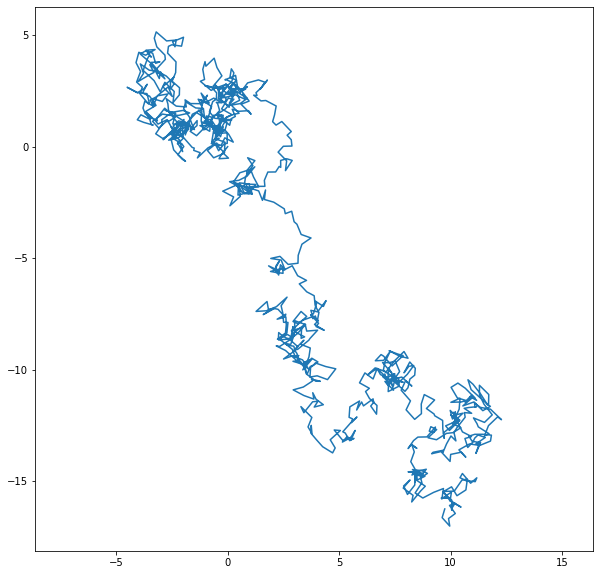

In [66]:
d=2
N = 1000
fig = plt.figure(figsize=(10,10))
p = RW(N,d)
plt.plot([x[0] for x in p],[x[1] for x in p])
plt.axis('equal')

(-60.6972387364265, 71.32768454538096, -61.953641359716876, 73.84397935491114)

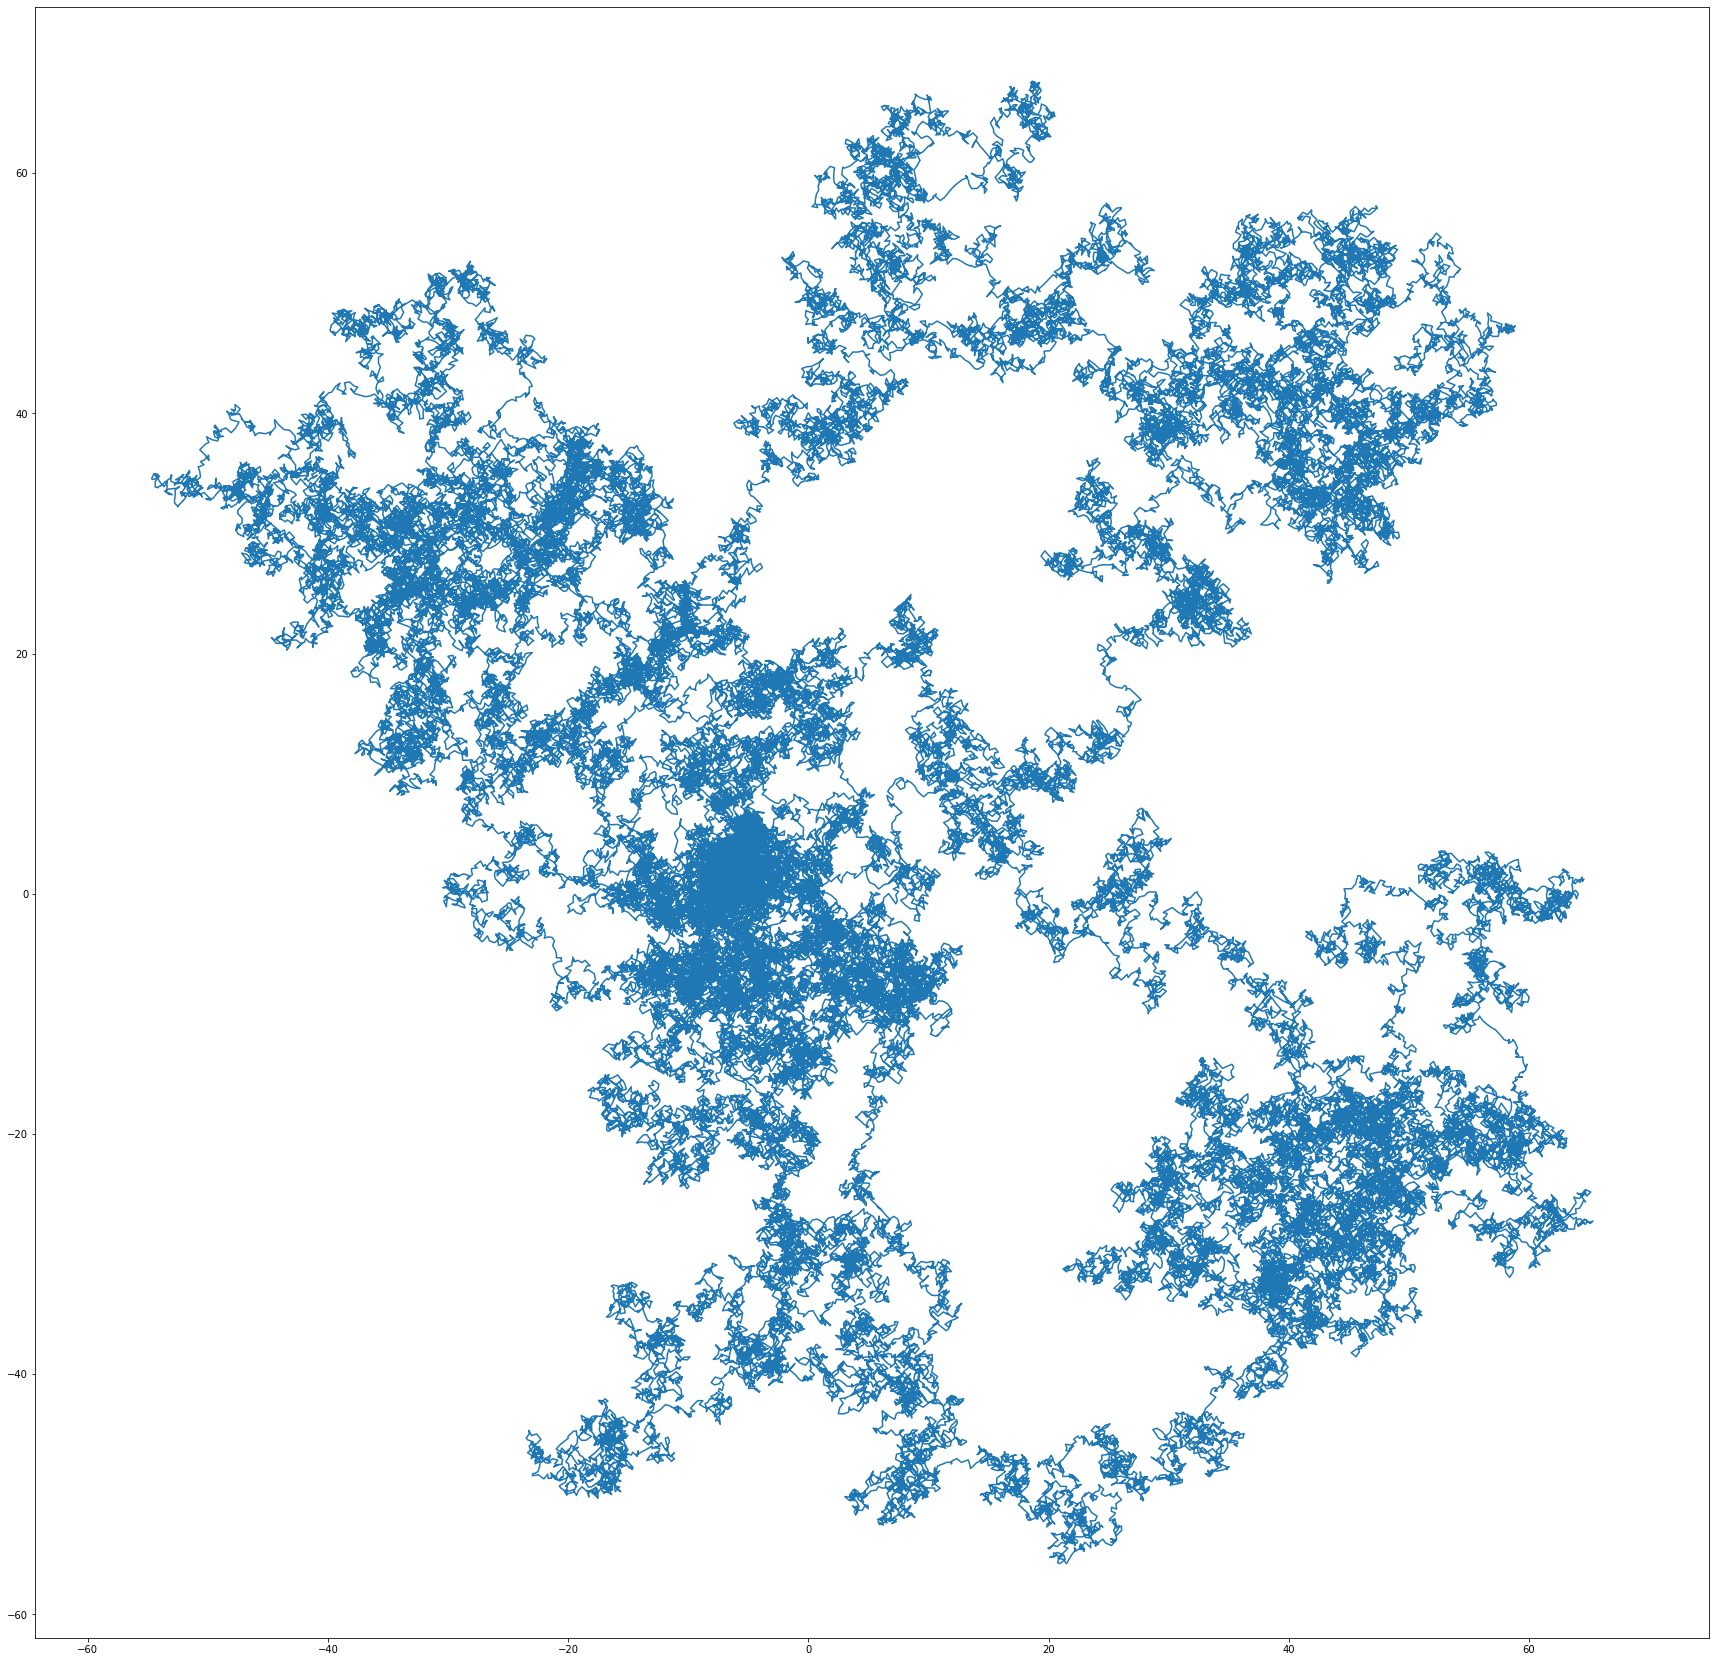

In [67]:
d=2
N = 100000
fig = plt.figure(figsize=(30,30))
p = RW(N,d)
plt.plot([x[0] for x in p],[x[1] for x in p])
plt.axis('equal')

# Emergent Symmetry

In [74]:
def RW_EndPoint(N,d):
    #taking d=2 by default
    p = RW(N,d)
    return(p[-1])

def RW_Scatter(n,N):
    li = []
    for i in range(n):
        EP = RW_EndPoint(N,2)
        li.append(EP)
    plt.scatter([x[0] for x in li],[y[1] for y in li],marker='.')
    plt.axis('equal')


    



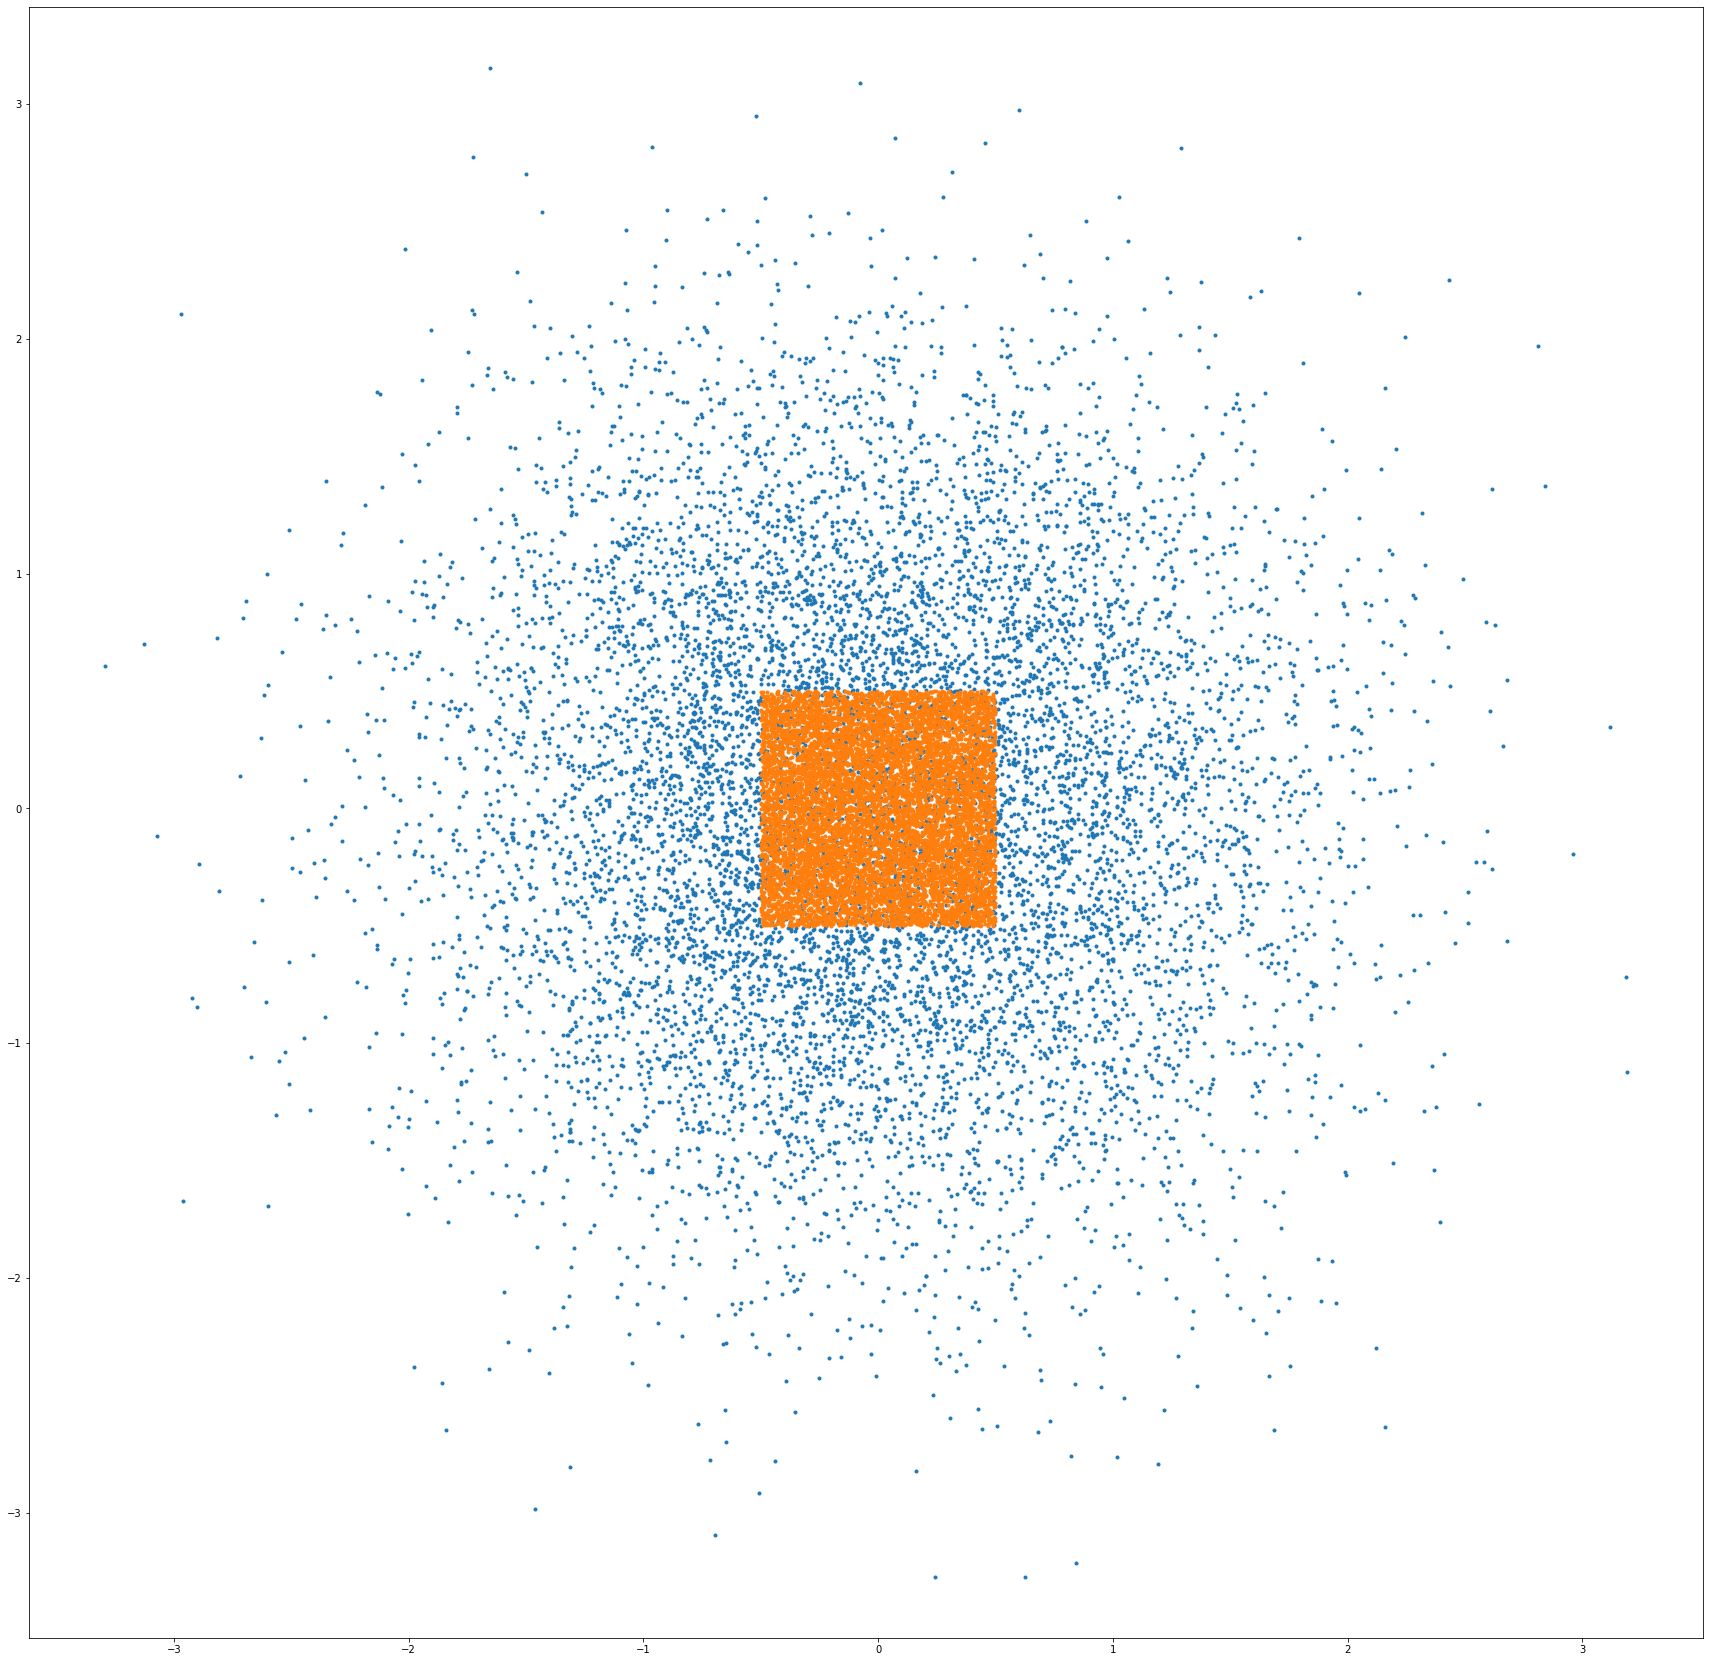

In [75]:
fig = plt.figure(figsize=(30,30))
RW_Scatter(10000,10)
RW_Scatter(10000,1)


This emergent symmetry arises because in the situation N=1 we are moving only a single step in each dimension, which creates a more linear distribution along the axes, resulting in a square-like shape.
However, with more steps (N>1), the randomness accumulates and tends to spread out more uniformly in all directions, leading to a circular-like endpoint distribution.






# Central Limit Theorem

In [220]:
#Theoretical step size
print('Theoretical Stepsize:',np.sqrt(1/12))

#Experimental Step Size
endpoints = [RW_EndPoint(1, 1)[0] for _ in range(100000)]
exp_a = statistics.stdev(endpoints)
print('Experimental Stepsize:',exp_a) 

Theoretical Stepsize: 0.28867513459481287
Experimental Stepsize: 0.2884582436997746


In [205]:
def RW_1DHisto(n,N):
    endpoints = [RW_EndPoint(N, 1)[0] for _ in range(n)]

    plt.hist(endpoints,bins=50,density=True)
    
    
    a = 1/np.sqrt(12)#Predicted
    
    x = np.linspace(-3*a*np.sqrt(N), 3*a*np.sqrt(N), 1000)
    plt.xlabel('Endpoint')
    plt.ylabel('Probability Density')
    
    plt.title(f'Histogram of Endpoint Distribution for {n} Walks')
    
    predicted_distribution = (1 / (np.sqrt(2 * np.pi) * a)) * np.exp(-(x ** 2) / (2 * (a ** 2)))
    plt.plot(x, predicted_distribution)
    

    plt.show()
    
    return endpoints

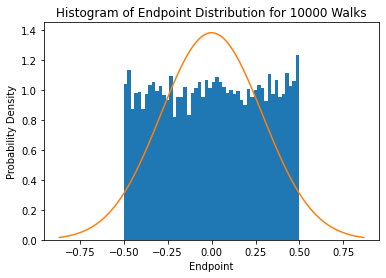

In [206]:
p = RW_1DHisto(10000,1)
plt.show()

In [207]:
statistics.stdev(p)

0.2908524904550887

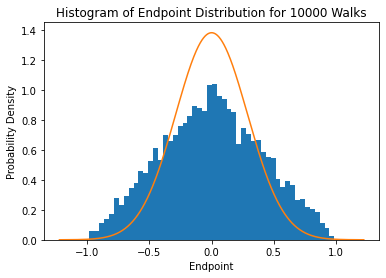

In [208]:
p = RW_1DHisto(10000,2)
plt.show()

In [209]:
statistics.stdev(p)

0.40705395295415203

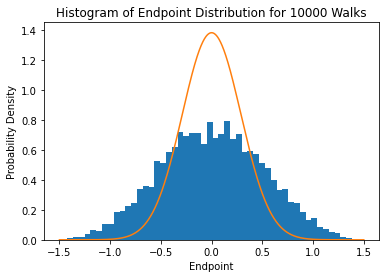

In [210]:
p = RW_1DHisto(10000,3)
plt.show()

In [211]:
statistics.stdev(p)

0.5039673496837904

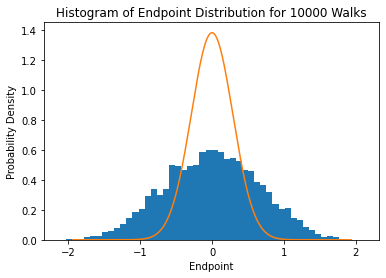

In [212]:
p = RW_1DHisto(10000,5)
plt.show()

In [213]:
statistics.stdev(p)

0.6551554694483167

We can clearly see that for higher values of N, the density function approaches a gaussian.